<small><small><i>
All the IPython Notebooks in **Clustering Algorithms** lecture series by **[Dr. Milaan Parmar](https://www.linkedin.com/in/milaanparmar/)** are available @ **[GitHub](https://github.com/milaan9/Clustering_Algorithms)**
</i></small></small>

# Dimensionality Reduction

In [1]:
!pip install sklearn

In [2]:
import numpy as np
import os

# making random output stable
np.random.seed(42)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

# Create an array of the given shape 
# and populate it with random samples from a uniform distribution over [0, 1).
angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
# print('angles: {}\nsize of dataset: {}'.format(angles, angles.shape))

X = np.empty((m, 3))
# print(X)
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

## PCA using Scikit-Learn
With Scikit-Learn, PCA is really trivial. It even takes care of mean centering for you, which has been perfectly packaged and easy to incorporate

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 0.99)

# you have to call 'fit' with appropriate arguments before using transrom method.
# a = pca.fit(X)
# b = pca.transform(X)
# or simply use fit_transform()

# 2-D
X_decorrelated_DR = pca.fit_transform(X)
X_decorrelated_DR[:] = X_decorrelated_DR[:]*(-1) 

# reconstruct dataset from X_decorrelated_DR
X_reconstructed = pca.inverse_transform(X_decorrelated_DR)

print("pca = PCA(n_components = 0.99)\n")
print("First 5 Projection Points:\n{}\n\n".format(X_decorrelated_DR[:5]))
print("Principal Components:\n{}\n\n".format(pca.components_))
print("Explained Variance Ratio:\n{}\n".format(pca.explained_variance_ratio_))
# print('reconstructed dataset:\n{}\n'.format(X_reconstructed))

pca = PCA(n_components = 0.99)

First 5 Projection Points:
[[ 0.690074    0.36150744]
 [-1.39636097 -0.34497714]
 [-1.00728461  0.35025708]
 [-0.2736333   0.50516373]
 [ 0.91324535 -0.26290852]]


Principal Components:
[[-0.95250178 -0.24902446 -0.17529172]
 [ 0.29267159 -0.9076305  -0.30091563]]


Explained Variance Ratio:
[0.85406025 0.13622918]



***We can visibly tell that we can reduce our dimensions from 3 to 2 while preserving 99% of the variance***

In [4]:
# preserving 99.9% of the variance
pca = PCA(n_components = 0.999)

# 3-D
X_decorrelated = pca.fit_transform(X)

print("pca = PCA(n_components = 0.999)\n")
print("First 5 Projection Points:\n{}\n\n".format(X_decorrelated[:5]))
print("Principal Components:\n{}\n\n".format(pca.components_))
print("Explained Variance Ratio:\n{}\n".format(pca.explained_variance_ratio_))

pca = PCA(n_components = 0.999)

First 5 Projection Points:
[[-0.690074   -0.36150744  0.05176509]
 [ 1.39636097  0.34497714  0.04887253]
 [ 1.00728461 -0.35025708  0.04753837]
 [ 0.2736333  -0.50516373  0.13786693]
 [-0.91324535  0.26290852 -0.03027986]]


Principal Components:
[[-0.95250178 -0.24902446 -0.17529172]
 [ 0.29267159 -0.9076305  -0.30091563]
 [-0.08416476 -0.33792558  0.93740205]]


Explained Variance Ratio:
[0.85406025 0.13622918 0.00971057]



In [5]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

In [6]:
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1, x2 = np.meshgrid(x1s, x2s)
# principal components (orthogonal vectors that decide the hyperplane)
C = pca.components_
print("Principal Components:\n{}\n\n".format(C))
# normal-vector of the hyperplane
normal_vector = np.cross(C[0,:], C[1,:])

# calculate z-value of the dataset
z = np.empty((10, 10))
for i in range(0,10):
    for j in range(0,10):
        z[i, j] = -(normal_vector[0]*x1[i, j]+normal_vector[1]*x2[i ,j])/normal_vector[2]

print("Z value of the hyperplane:\n{}\n".format(z))

Principal Components:
[[-0.95250178 -0.24902446 -0.17529172]
 [ 0.29267159 -0.9076305  -0.30091563]
 [-0.08416476 -0.33792558  0.93740205]]


Z value of the hyperplane:
[[-0.63025233 -0.59433828 -0.55842423 -0.52251018 -0.48659612 -0.45068207
  -0.41476802 -0.37885397 -0.34293992 -0.30702587]
 [-0.52611031 -0.49019626 -0.45428221 -0.41836815 -0.3824541  -0.34654005
  -0.310626   -0.27471195 -0.2387979  -0.20288384]
 [-0.42196829 -0.38605424 -0.35014018 -0.31422613 -0.27831208 -0.24239803
  -0.20648398 -0.17056993 -0.13465587 -0.09874182]
 [-0.31782626 -0.28191221 -0.24599816 -0.21008411 -0.17417006 -0.13825601
  -0.10234196 -0.0664279  -0.03051385  0.0054002 ]
 [-0.21368424 -0.17777019 -0.14185614 -0.10594209 -0.07002804 -0.03411399
   0.00180007  0.03771412  0.07362817  0.10954222]
 [-0.10954222 -0.07362817 -0.03771412 -0.00180007  0.03411399  0.07002804
   0.10594209  0.14185614  0.17777019  0.21368424]
 [-0.0054002   0.03051385  0.0664279   0.10234196  0.13825601  0.17417006
   0.21

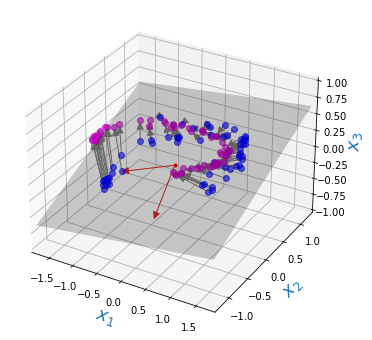

In [7]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# setup parameters of the coordinates
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection="3d")    # first figure of 1*1 space
ax.set_xlabel("$x_1$", fontsize=18, color="tab:blue")
ax.set_ylabel("$x_2$", fontsize=18, color="tab:blue")
ax.set_zlabel("$x_3$", fontsize=18, color="tab:blue")
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

# plot the X_decorrelated_DR dataset
k = 0
Z_projected = np.empty((60, 1))
for i in range(0,60):
    for j in range(0,2):
        while k<60:
            Z_projected[k] = -(normal_vector[0]*X_decorrelated_DR[i, j]+normal_vector[1]*X_decorrelated_DR[i ,j])/normal_vector[2]
            k = k+1

# plot the original datatset
ax.plot(X[:, 0], X[:, 1], X[:, 2], "bo", alpha=0.6)
      
# plot the X_decorrelated_DR dataset
ax.plot(X_decorrelated_DR[:, 0], X_decorrelated_DR[:, 1], Z_projected[:, 0], "mo", alpha=0.6)

# plot the track of projection
for j in range(0, 60):
    ax.add_artist(Arrow3D([X[j, 0], X_decorrelated_DR[j, 0]],[X[j, 1], X_decorrelated_DR[j, 1]],[X[j, 2], Z_projected[j, 0]], mutation_scale=15, lw=1, arrowstyle="-|>", color="tab:gray"))

# plot the hyperplane(2_D) for projection
ax.plot_surface(x1, x2, z, alpha=0.2, color="k")

# plot the principal compoents(orthogonal vectors that decide the hyperplane)
ax.add_artist(Arrow3D([0, C[0, 0]],[0, C[0, 1]],[0, C[0, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="tab:red"))
ax.add_artist(Arrow3D([0, C[1, 0]],[0, C[1, 1]],[0, C[1, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="tab:red"))

# plot the origin
ax.plot([0], [0], [0], "r.")

plt.show()